Decision tree

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report,  ConfusionMatrixDisplay
from matplotlib.pylab import rcParams
#Load the dataset into a pandas DataFrame.
df = pd.read_csv('preprocessed/df.csv')
df.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [6]:
y = np.asarray(df['class'])
X = np.asarray(df.drop(columns=['class']))

print(len(y))

400


In [8]:
# split the dataset to train and test sets. set the test set size to 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, )

In [9]:
# replace NANs with 0s both in X_train, X_test
X_train_no_nan = np.nan_to_num(X_train, copy=True, nan=0 )
X_test_no_nan = np.nan_to_num(X_test, copy=True, nan=0 )

In [10]:
from sklearn.metrics import confusion_matrix


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_no_nan,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_no_nan)

print(classification_report(y_test, y_pred, labels=clf.classes_))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.98      0.98      0.98        51

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



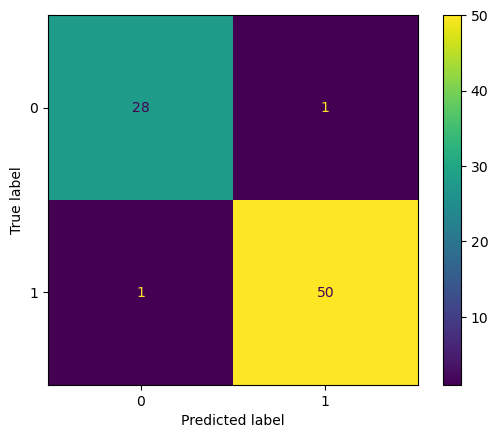

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

<Axes: >

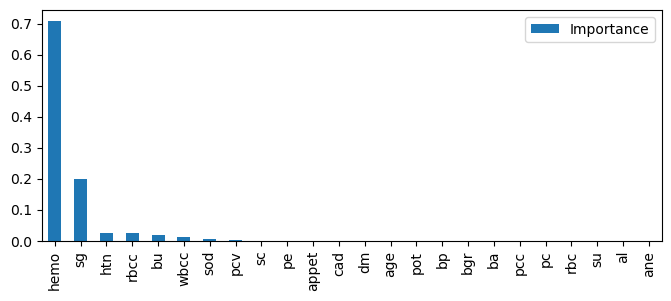

In [12]:
#  plot the importance of each feature as a bar plot and plot the decision tree
feat_importances = pd.DataFrame(clf.feature_importances_, index=numeric.drop(columns=['class']).columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,3))

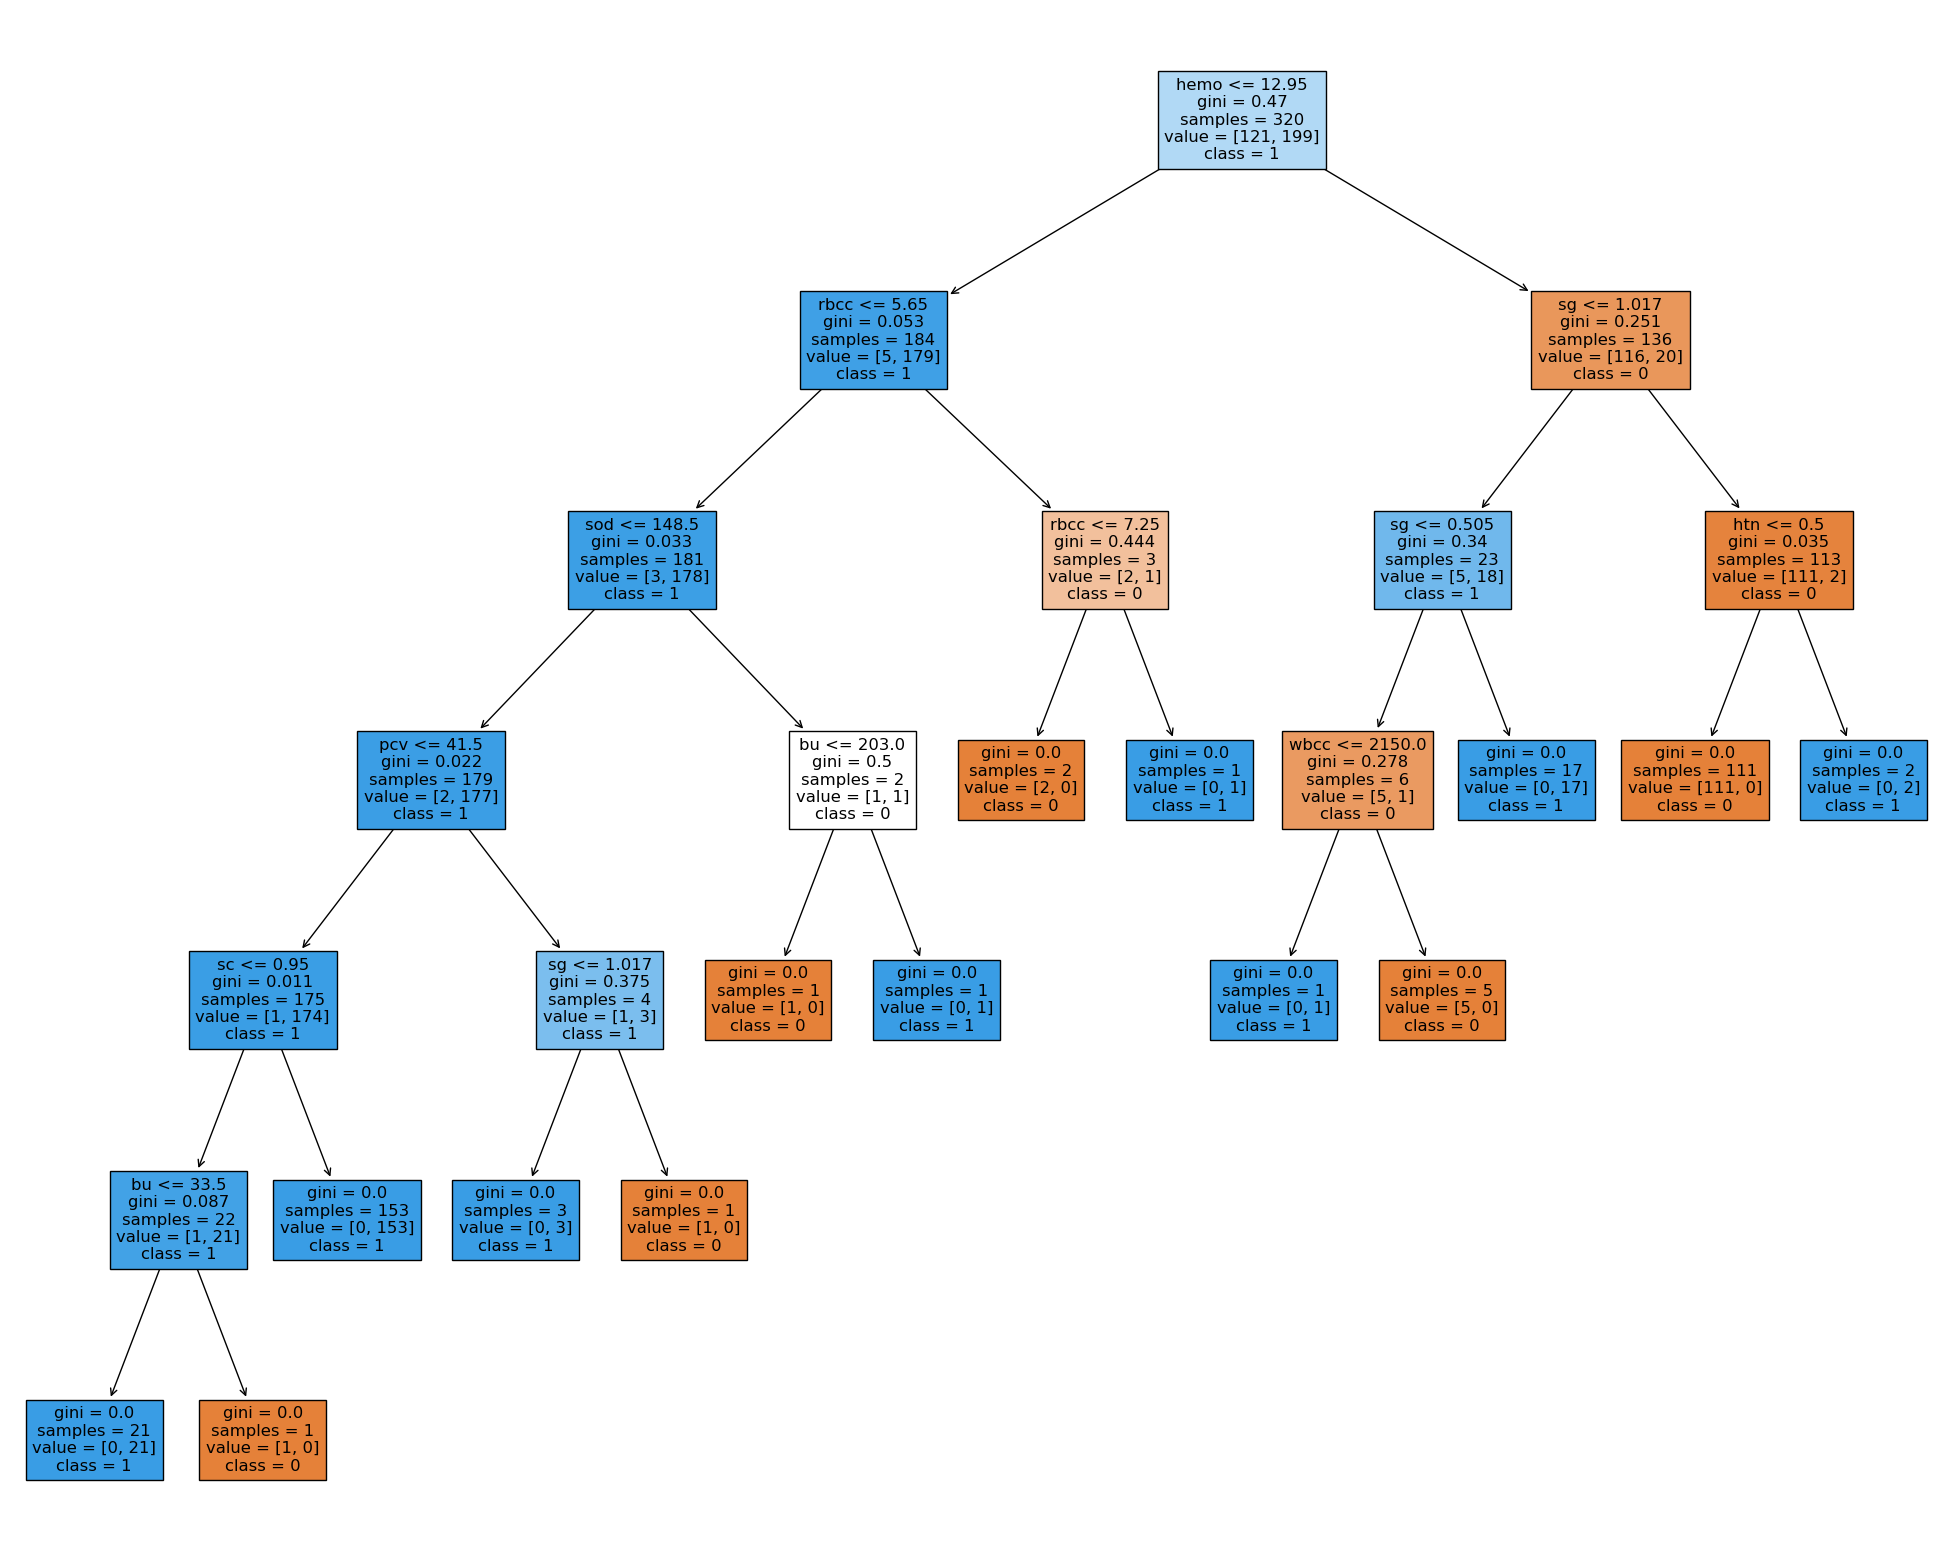

In [13]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=numeric.drop(columns=['class']).columns, class_names=['0', '1'], filled=True)

## Random forest


In [14]:
forest = RandomForestClassifier()
forest.fit(X_train_no_nan, y_train)
y_forest_pred = forest.predict(X_test_no_nan)

print(classification_report(y_test, y_forest_pred, labels=forest.classes_))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.98      1.00      0.99        51

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



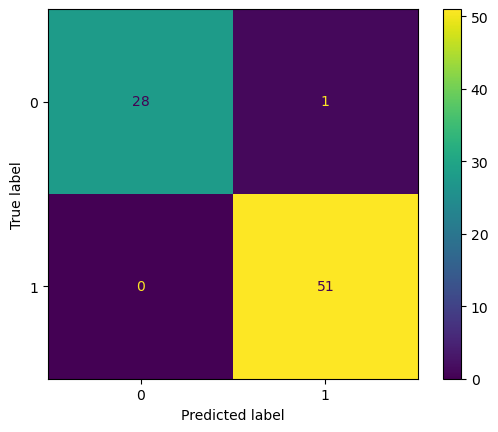

In [15]:
conf_mat_forest = confusion_matrix(y_test, y_forest_pred)
disp_forest = ConfusionMatrixDisplay(conf_mat_forest, display_labels=forest.classes_)
disp_forest.plot()
plt.show()

<Axes: >

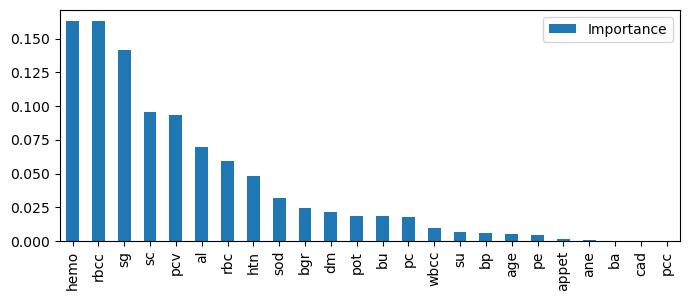

In [16]:
# Plot the feature importance as a bar plot
feat_importances_forest = pd.DataFrame(forest.feature_importances_, index=numeric.drop(columns=['class']).columns, columns=["Importance"])
feat_importances_forest.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances_forest.plot(kind='bar', figsize=(8,3))
